In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib
import numpy as np
import scipy as sp
import scipy.stats
%matplotlib inline

In [2]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set_style('white')

def set_style():
    sns.set(font='serif', font_scale=1.4)
    
   # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

In [3]:
def plot_sig_line(ax, x1, x2, y1, h, padding=0.3):
    '''
    Plots the bracket thing denoting significance in plots. h controls how tall vertically the bracket is.
    Only need one y coordinate (y1) since the bracket is parallel to the x-axis.
    '''
    ax.plot([x1, x1, x2, x2], [y1, y1 + h, y1 + h, y1], linewidth=1, color='k')
    ax.text(0.5*(x1 + x2), y1 + h + padding * h, '*', color='k', fontsize=16, fontweight='normal')

In [4]:
df = pd.read_csv('interactive_reward_design_hri/mainstudy.csv')

In [5]:
# Total time
indep_totaltime = df[df['joint_or_indep'] == 'indep']['totaltime'] / 1000.0
joint_totaltime = df[df['joint_or_indep'] == 'joint']['totaltime'] / 1000.0

# Total runs
indep_totalruns = df[df['joint_or_indep'] == 'indep']['totalruns']
joint_totalruns = df[df['joint_or_indep'] == 'joint']['totalruns']

# Regret
indep_regret =  df[df['joint_or_indep'] == 'indep']['regret']
joint_regret =  df[df['joint_or_indep'] == 'joint']['regret']

# Regret IRD
indep_regretIRD = df[df['joint_or_indep'] == 'indep']['regretIRD']
joint_regretIRD = df[df['joint_or_indep'] == 'joint']['regretIRD']

# Regret IRD risk averse
indep_regretIRD_riskaverse = df[df['joint_or_indep'] == 'indep']['regretIRD_riskaverse']
joint_regretIRD_riskaverse = df[df['joint_or_indep'] == 'joint']['regretIRD_riskaverse']

indep_likert_1 = df[df['joint_or_indep'] == 'indep']['likert 1 (easy)']
indep_likert_2 = 8 - df[df['joint_or_indep'] == 'indep']['likert 2 (harder)']
indep_likert_3 = df[df['joint_or_indep'] == 'indep']['likert 3 (fast)']
indep_likert_4 = df[df['joint_or_indep'] == 'indep']['likert 4 (less-runs)']             
indep_likert_5 = 8 - df[df['joint_or_indep'] == 'indep']['likert 5 (frustrating)']
indep_likert_6 = 8 - df[df['joint_or_indep'] == 'indep']['likert 6 (back-forth)']

indep_likert = (indep_likert_1 + indep_likert_2 + indep_likert_3 + indep_likert_4 + indep_likert_5 + indep_likert_6) / 6.0

joint_likert_1 = df[df['joint_or_indep'] == 'joint']['likert 1 (easy)']
joint_likert_2 = 8 - df[df['joint_or_indep'] == 'joint']['likert 2 (harder)']
joint_likert_3 = df[df['joint_or_indep'] == 'joint']['likert 3 (fast)']
joint_likert_4 = df[df['joint_or_indep'] == 'joint']['likert 4 (less-runs)']             
joint_likert_5 = 8 - df[df['joint_or_indep'] == 'joint']['likert 5 (frustrating)']
joint_likert_6 = 8 - df[df['joint_or_indep'] == 'joint']['likert 6 (back-forth)']

joint_likert = (joint_likert_1 + joint_likert_2 + joint_likert_3 + joint_likert_4 + joint_likert_5 + joint_likert_6) / 6.0

In [6]:
(joint_totaltime.mean() - indep_totaltime.mean()) / joint_totaltime.mean()

0.36593123524415649

In [7]:
(joint_totalruns.mean() - indep_totalruns.mean()) / joint_totalruns.mean()

0.36837209302325585

In [8]:
(joint_regret.mean() - indep_regret.mean()) / joint_regret.mean()

0.55319148936170248

In [9]:
(joint_regretIRD.mean() - indep_regretIRD.mean()) / joint_regretIRD.mean()

0.4487757100881492

In [10]:
(joint_regretIRD_riskaverse.mean() - indep_regretIRD_riskaverse.mean()) / joint_regretIRD_riskaverse.mean()

0.51141552511415489

In [11]:
(indep_likert.mean() - joint_likert.mean()) / indep_likert.mean()

0.57240704500978479

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


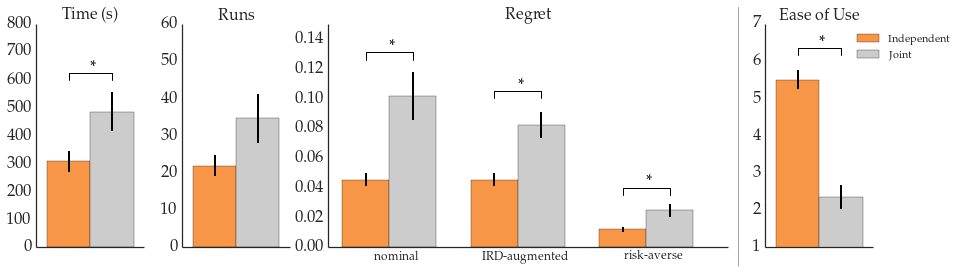

In [12]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig = plt.gcf()
ax1 = plt.subplot2grid((1, 6), (0, 0))
ax2 = plt.subplot2grid((1, 6), (0, 1))
ax3 = plt.subplot2grid((1, 6), (0, 2), colspan=3)
ax4 = plt.subplot2grid((1, 6), (0, 5))


set_style()

indep_color = '#f79646'
joint_color = '#cccccc'

##### Time #####
ax1.set_title('Time (s)', fontsize=16, fontweight='normal')
r1 = ax1.bar([0.0], 
             [indep_totaltime.mean()], 
             yerr=[indep_totaltime.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax1.bar([1.0], 
             [joint_totaltime.mean()], 
             yerr=[joint_totaltime.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
plot_sig_line(ax1, 0.5, 1.5, 600, 25)
ax1.set_ylim([0, 800])
ax1.set_xlim([-0.25, 2.25])
plt.sca(ax1)
plt.xticks([])
# ax1.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Runs #####
ax2.set_title('Runs', fontsize=16, fontweight='normal')
r1 = ax2.bar([0.0], 
             [indep_totalruns.mean()], 
             yerr=[indep_totalruns.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax2.bar([1.0], 
             [joint_totalruns.mean()], 
             yerr=[joint_totalruns.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax2, 0.5, 1.5, 45, 3)
ax2.set_ylim([0, 60])
ax2.set_xlim([-0.25, 2.25])
plt.sca(ax2)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Regret #####
shift = -0.175
ax3.set_title('Regret', fontsize=16, fontweight='normal')
rr1 = ax3.bar([0.0, 2.25, 4.5], 
             [indep_regret.mean(),
              indep_regretIRD.mean(),
              indep_regretIRD_riskaverse.mean()], 
             yerr=[indep_regret.sem(),
                   indep_regretIRD.sem(),
                   indep_regretIRD_riskaverse.sem()], 
             color=[indep_color, 
                    indep_color,
                    indep_color], 
             ecolor='black', 
             width=1.0 + shift,
             error_kw=dict(elinewidth=2, capsize=0))
rr2 = ax3.bar([1.0 + shift, 3.25 + shift, 5.5 + shift], 
             [joint_regret.mean(),
              joint_regretIRD.mean(),
              joint_regretIRD_riskaverse.mean()], 
             yerr=[joint_regret.sem(),
                   joint_regretIRD.sem(),
                   joint_regretIRD_riskaverse.sem()], 
             color=[joint_color,
                    joint_color,
                    joint_color], 
             ecolor='black',
             width=1.0 + shift,
             error_kw=dict(elinewidth=2, capsize=0))

barwidth = 1.0 + shift
plot_sig_line(ax3, 0.5 * barwidth, 1.5 * barwidth, 0.126, 0.005, padding=0.3)
plot_sig_line(ax3, 2.25 + 0.5 * barwidth, 2.25 + 1.5 * barwidth, 0.1, 0.005, padding=0.3)
plot_sig_line(ax3, 4.5 + 0.5 * barwidth, 4.5 + 1.5 * barwidth, 0.035, 0.005, padding=0.3)
ax3.set_ylim([0, 0.15])
ax3.set_xlim([-0.25, 6.75])
plt.sca(ax3)
plt.xticks([1.125 + shift, 3.375 + shift, 5.625 + shift], 
           ["nominal", "IRD-augmented", "risk-averse"],
           fontsize=12)
################

# if not first:
# ax1.set_frame_on(False)
# xmin, xmax = ax1.get_xaxis().get_view_interval()
# ymin, ymax = ax1.get_yaxis().get_view_interval()
# ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
# else:
# if show_legend:

# plt.setp(leg.get_title(),fontsize=14)

ax3.plot([0.775, 0.775], [0.06, 0.96], color='darkgray', lw=1, 
         transform=fig.transFigure, clip_on=False) 

##### Ease of use #####
ax4.set_title('Ease of Use', fontsize=16, fontweight='normal')
r1 = ax4.bar([0.0], 
             [indep_likert.mean()], 
             yerr=[indep_likert.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax4.bar([1.0], 
             [joint_likert.mean()], 
             yerr=[joint_likert.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
plot_sig_line(ax4, 0.5, 1.5, 6.15, 0.2)
ax4.set_ylim([1, 7])
ax4.set_xlim([-0.25, 2.25])
plt.sca(ax4)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

leg = ax4.legend((r1[0], r2[0]), 
                ('Independent', 'Joint'), 
                loc='upper right',
                ncol=1, 
                fontsize=11,
                bbox_to_anchor=(1.8, 1.0))

plt.subplots_adjust(wspace=0.35)

sns.despine(fig)
fig.set_figwidth(15)
fig.set_figheight(4)
plt.savefig('interactive_reward_design_hri/MainStudy.pdf', bbox_inches='tight')

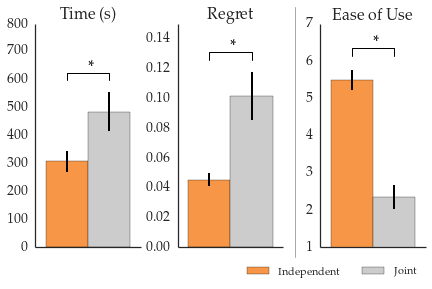

In [38]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig = plt.gcf()
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))


set_style()

indep_color = '#f79646'
joint_color = '#cccccc'

##### Time #####
ax1.set_title('Time (s)', fontsize=16, fontweight='normal')
r1 = ax1.bar([0.0], 
             [indep_totaltime.mean()], 
             yerr=[indep_totaltime.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax1.bar([1.0], 
             [joint_totaltime.mean()], 
             yerr=[joint_totaltime.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
plot_sig_line(ax1, 0.5, 1.5, 600, 25)
ax1.set_ylim([0, 800])
ax1.set_xlim([-0.25, 2.25])
plt.sca(ax1)
plt.xticks([])
# ax1.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

##### Regret #####
ax2.set_title('Regret', fontsize=16, fontweight='normal')
rr1 = ax2.bar([0.0], 
             [indep_regret.mean()], 
             yerr=[indep_regret.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
rr2 = ax2.bar([1.0], 
             [joint_regret.mean()], 
             yerr=[joint_regret.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))

barwidth = 1.0 + shift
plot_sig_line(ax2, 0.5, 1.5, 0.126, 0.005, padding=0.3)
ax2.set_ylim([0, 0.15])
ax2.set_xlim([-0.25, 2.25])
plt.sca(ax2)
plt.xticks([])
################

# if not first:
# ax1.set_frame_on(False)
# xmin, xmax = ax1.get_xaxis().get_view_interval()
# ymin, ymax = ax1.get_yaxis().get_view_interval()
# ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
# else:
# if show_legend:

# plt.setp(leg.get_title(),fontsize=14)

separator_x = 0.64
ax2.plot([separator_x, separator_x], [0.09, 0.96], color='darkgray', lw=1, 
         transform=fig.transFigure, clip_on=False) 

##### Ease of use #####
ax3.set_title('Ease of Use', fontsize=16, fontweight='normal')
r1 = ax3.bar([0.0], 
             [indep_likert.mean()], 
             yerr=[indep_likert.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax3.bar([1.0], 
             [joint_likert.mean()], 
             yerr=[joint_likert.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
plot_sig_line(ax3, 0.5, 1.5, 6.15, 0.2)
ax3.set_ylim([1, 7])
ax3.set_xlim([-0.25, 2.25])
plt.sca(ax3)
plt.xticks([])
# ax2.set_ylabel('time (s)', fontsize=16, fontweight='normal')
################

leg = ax3.legend((r1[0], r2[0]), 
                ('Independent', 'Joint'), 
                loc='lower right',
                ncol=2, 
                fontsize=11,
                bbox_to_anchor=(1.0, -0.18))

plt.subplots_adjust(wspace=0.35)

sns.despine(fig)
fig.set_figwidth(7)
fig.set_figheight(4)
plt.savefig('interactive_reward_design_hri/MainStudy_HRIPioneers2018.pdf', bbox_inches='tight')
# plt.show()

In [8]:
df = pd.read_csv('interactive_reward_design_hri/factorial_study/factorial.csv')

In [9]:
indep_time_ll = df[(df['indep_or_joint'] == 'indep') &
                   (df['feas_size'] == 'large') &
                   (df['intersection_size'] == 'large')]['time'] / 1000.0
indep_time_ls = df[(df['indep_or_joint'] == 'indep') &
                   (df['feas_size'] == 'large') &
                   (df['intersection_size'] == 'small')]['time'] / 1000.0
indep_time_sl = df[(df['indep_or_joint'] == 'indep') &
                   (df['feas_size'] == 'small') &
                   (df['intersection_size'] == 'large')]['time'] / 1000.0
indep_time_ss = df[(df['indep_or_joint'] == 'indep') &
                   (df['feas_size'] == 'small') &
                   (df['intersection_size'] == 'small')]['time'] / 1000.0

joint_time_ll = df[(df['indep_or_joint'] == 'joint') &
                   (df['feas_size'] == 'large') &
                   (df['intersection_size'] == 'large')]['time'] / 1000.0
joint_time_ls = df[(df['indep_or_joint'] == 'joint') &
                   (df['feas_size'] == 'large') &
                   (df['intersection_size'] == 'small')]['time'] / 1000.0
joint_time_sl = df[(df['indep_or_joint'] == 'joint') &
                   (df['feas_size'] == 'small') &
                   (df['intersection_size'] == 'large')]['time'] / 1000.0
joint_time_ss = df[(df['indep_or_joint'] == 'joint') &
                   (df['feas_size'] == 'small') &
                   (df['intersection_size'] == 'small')]['time'] / 1000.0

indep_regret_ll = df[(df['indep_or_joint'] == 'indep') &
                   (df['feas_size'] == 'large') &
                   (df['intersection_size'] == 'large')]['regret']
indep_regret_ls = df[(df['indep_or_joint'] == 'indep') &
                   (df['feas_size'] == 'large') &
                   (df['intersection_size'] == 'small')]['regret']
indep_regret_sl = df[(df['indep_or_joint'] == 'indep') &
                   (df['feas_size'] == 'small') &
                   (df['intersection_size'] == 'large')]['regret']
indep_regret_ss = df[(df['indep_or_joint'] == 'indep') &
                   (df['feas_size'] == 'small') &
                   (df['intersection_size'] == 'small')]['regret']

joint_regret_ll = df[(df['indep_or_joint'] == 'joint') &
                   (df['feas_size'] == 'large') &
                   (df['intersection_size'] == 'large')]['regret']
joint_regret_ls = df[(df['indep_or_joint'] == 'joint') &
                   (df['feas_size'] == 'large') &
                   (df['intersection_size'] == 'small')]['regret']
joint_regret_sl = df[(df['indep_or_joint'] == 'joint') &
                   (df['feas_size'] == 'small') &
                   (df['intersection_size'] == 'large')]['regret']
joint_regret_ss = df[(df['indep_or_joint'] == 'joint') &
                   (df['feas_size'] == 'small') &
                   (df['intersection_size'] == 'small')]['regret']

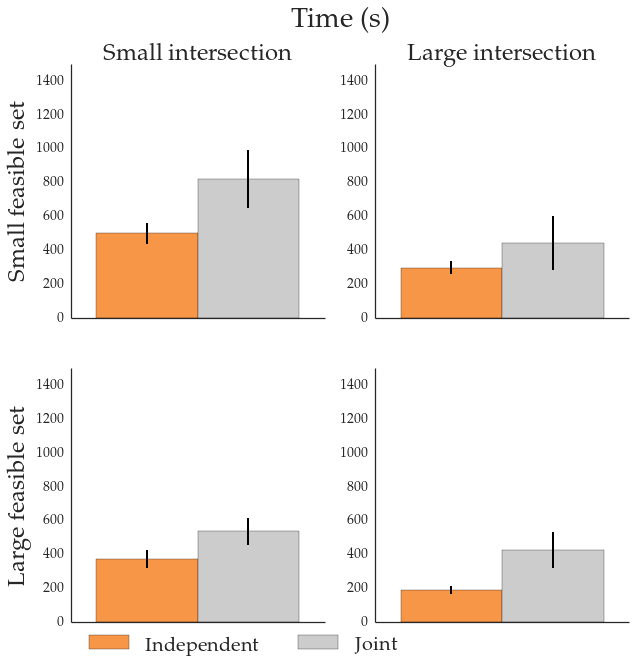

In [10]:
set_style()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.suptitle('Time (s)', fontsize=28, fontweight='normal')

##### Time SS #####
ax1.set_title('Small intersection', fontsize=24, fontweight='normal')
r1 = ax1.bar([0.0], 
             [indep_time_ss.mean()], 
             yerr=[indep_time_ss.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax1.bar([1.0], 
             [joint_time_ss.mean()], 
             yerr=[joint_time_ss.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax1, 0.5, 1.5, 600, 40)
ax1.set_ylim([0, 1500])
ax1.set_xlim([-0.25, 2.25])
ax1.set_ylabel('Small feasible set', fontsize=24, fontweight='normal')
plt.sca(ax1)
plt.xticks([])
################

##### Time SL #####
ax2.set_title('Large intersection', fontsize=24, fontweight='normal')
r1 = ax2.bar([0.0], 
             [indep_time_sl.mean()], 
             yerr=[indep_time_sl.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax2.bar([1.0], 
             [joint_time_sl.mean()], 
             yerr=[joint_time_sl.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax2, 0.5, 1.5, 600, 40)
ax2.set_ylim([0, 1500])
ax2.set_xlim([-0.25, 2.25])

# ax2.yaxis.set_label_position('right')
# ax2.set_ylabel('Small feasible set', fontsize=18, fontweight='normal')

plt.sca(ax2)
plt.xticks([])
################

##### Time LS #####
r1 = ax3.bar([0.0], 
             [indep_time_ls.mean()], 
             yerr=[indep_time_ls.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax3.bar([1.0], 
             [joint_time_ls.mean()], 
             yerr=[joint_time_ls.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax3, 0.5, 1.5, 600, 40)
ax3.set_ylim([0, 1500])
ax3.set_xlim([-0.25, 2.25])
ax3.set_ylabel('Large feasible set', fontsize=24, fontweight='normal')
plt.sca(ax3)
plt.xticks([])
################

##### Time LL #####
r1 = ax4.bar([0.0], 
             [indep_time_ll.mean()], 
             yerr=[indep_time_ll.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax4.bar([1.0], 
             [joint_time_ll.mean()], 
             yerr=[joint_time_ll.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax4, 0.5, 1.5, 600, 40)
ax4.set_ylim([0, 1500])
ax4.set_xlim([-0.25, 2.25])
plt.sca(ax4)
plt.xticks([])
################

# leg = ax4.legend((r1[0], r2[0]), 
#                 ('Independent', 'Joint'), 
#                 loc='lower left',
#                 ncol=1, 
#                 fontsize=14,
#                 bbox_to_anchor=(1.2, 1.0))
leg = ax3.legend((r1[0], r2[0]), 
                ('Independent', 'Joint'), 
                loc='lower left',
                ncol=2, 
                fontsize=20,
                bbox_to_anchor=(0.0, -0.2))

sns.despine(fig)
fig.set_figwidth(10)
fig.set_figheight(10)
plt.savefig('interactive_reward_design_hri/FactorialTime.pdf', bbox_inches='tight')

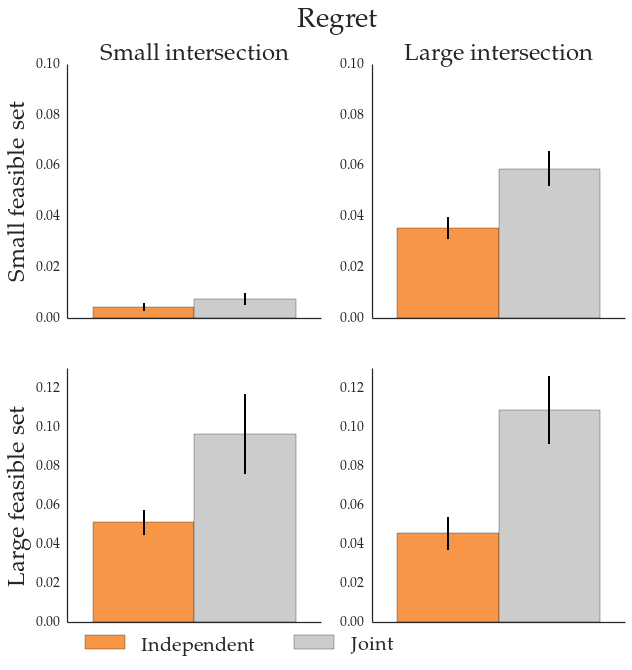

In [11]:
set_style()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.suptitle('Regret', fontsize=28, fontweight='normal')

##### Time SS #####
ax1.set_title('Small intersection', fontsize=24, fontweight='normal')
r1 = ax1.bar([0.0], 
             [indep_regret_ss.mean()], 
             yerr=[indep_regret_ss.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax1.bar([1.0], 
             [joint_regret_ss.mean()], 
             yerr=[joint_regret_ss.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax1, 0.5, 1.5, 600, 40)
ax1.set_ylim([0, 0.1])
ax1.set_xlim([-0.25, 2.25])
ax1.set_ylabel('Small feasible set', fontsize=24, fontweight='normal')
plt.sca(ax1)
plt.xticks([])
################

##### Time SL #####
ax2.set_title('Large intersection', fontsize=24, fontweight='normal')
r1 = ax2.bar([0.0], 
             [indep_regret_sl.mean()], 
             yerr=[indep_regret_sl.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax2.bar([1.0], 
             [joint_regret_sl.mean()], 
             yerr=[joint_regret_sl.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax2, 0.5, 1.5, 600, 40)
ax2.set_ylim([0, 0.1])
ax2.set_xlim([-0.25, 2.25])

# ax2.yaxis.set_label_position('right')
# ax2.set_ylabel('Small feasible set', fontsize=18, fontweight='normal')

plt.sca(ax2)
plt.xticks([])
################

##### Time LS #####
r1 = ax3.bar([0.0], 
             [indep_regret_ls.mean()], 
             yerr=[indep_regret_ls.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax3.bar([1.0], 
             [joint_regret_ls.mean()], 
             yerr=[joint_regret_ls.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax3, 0.5, 1.5, 600, 40)
ax3.set_ylim([0, 0.13])
ax3.set_xlim([-0.25, 2.25])
ax3.set_ylabel('Large feasible set', fontsize=24, fontweight='normal')
plt.sca(ax3)
plt.xticks([])
################

##### Time LL #####
r1 = ax4.bar([0.0], 
             [indep_regret_ll.mean()], 
             yerr=[indep_regret_ll.sem()], 
             color=[indep_color], 
             ecolor='black', 
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
r2 = ax4.bar([1.0], 
             [joint_regret_ll.mean()], 
             yerr=[joint_regret_ll.sem()], 
             color=[joint_color], 
             ecolor='black',
             width=1.0,
             error_kw=dict(elinewidth=2, capsize=0))
# plot_sig_line(ax4, 0.5, 1.5, 600, 40)
ax4.set_ylim([0, 0.13])
ax4.set_xlim([-0.25, 2.25])
plt.sca(ax4)
plt.xticks([])
################

# leg = ax4.legend((r1[0], r2[0]), 
#                 ('Independent', 'Joint'), 
#                 loc='lower left',
#                 ncol=1, 
#                 fontsize=14,
#                 bbox_to_anchor=(1.2, 1.0))
leg = ax3.legend((r1[0], r2[0]), 
                ('Independent', 'Joint'), 
                loc='lower left',
                ncol=2, 
                fontsize=20,
                bbox_to_anchor=(0.0, -0.2))

sns.despine(fig)
fig.set_figwidth(10)
fig.set_figheight(10)
plt.savefig('interactive_reward_design_hri/FactorialRegret.pdf', bbox_inches='tight')

In [12]:
from colorworld import ColorWorld
import sqlite3


def load_colorworld_from_db(colorworld_id):
    conn = sqlite3.connect('/home/eratner/Dropbox/Berkeley/Experiments/interactive_reward_design_hri/colorworld_difficulty_analysis/colorworlds.db')
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM colorworlds WHERE colorworld_id={}".format(colorworld_id))
    row = cursor.fetchone()

    world = ColorWorld(rows=row[1], cols=row[2])
    world.start = [int(s) for s in row[3].split(',')]
    world.goal = [int(g) for g in row[4].split(',')]
    world.cell_colors = [int(c) for c in row[5].split(',')]
    
    conn.close()

    return world


mainstudy_colorworld_ids = [10009, 10007, 10008, 10010, 10006]
mainstudy_colorworlds = [load_colorworld_from_db(i) for i in mainstudy_colorworld_ids]

true_weights = np.array([[0.0],
                         [0.8],
                         [0.9],
                         [0.3],
                         [0.7],
                         [0.25]])

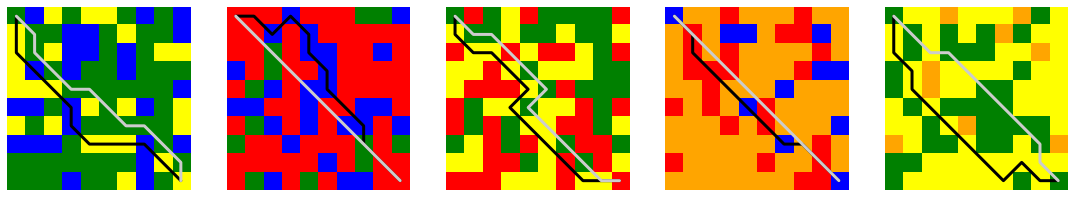

In [24]:
import matplotlib as mpl

set_style()

curr_weights = np.array([[0.0],
                         [0.5],
                         [0.5],
                         [0.5],
                         [0.2],
                         [0.5]])

fig, axes = plt.subplots(1, 5)

for ax, world in zip(axes, mainstudy_colorworlds):
    data = np.array(world.cell_colors)
    data.shape = (world.rows, world.cols)

    cmap = mpl.colors.ListedColormap(world.index_to_color.values())
    bounds = np.arange(len(world.index_to_color) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ax.imshow(data, interpolation='nearest',cmap=cmap, norm=norm, origin='upper')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    traj = world.plan(true_weights)
    traj_i = []
    traj_j = []
    for index in traj:
        i, j = world.index_to_ij(index)
        traj_i.append(i)
        traj_j.append(j)
        
    curr_traj = world.plan(curr_weights)
    curr_traj_i = []
    curr_traj_j = []
    for index in curr_traj:
        ii, jj = world.index_to_ij(index)
        curr_traj_i.append(ii)
        curr_traj_j.append(jj)
        
    ax.plot(traj_j, traj_i, color='black', linewidth=3)
    ax.plot(curr_traj_j, curr_traj_i, color='#cccccc', linewidth=3)

sns.despine(fig)
fig.set_figwidth(19)
fig.set_figheight(8)
plt.savefig('interactive_reward_design_hri/MainStudyEnvs.png', bbox_inches='tight')

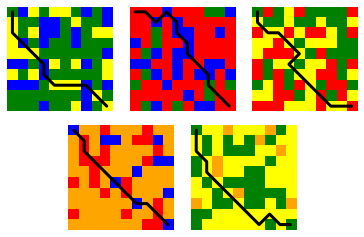

In [25]:
import matplotlib as mpl

set_style()

fig = plt.gcf()

for i, world in enumerate(mainstudy_colorworlds):
    data = np.array(world.cell_colors)
    data.shape = (world.rows, world.cols)
    
    row = i / 3
    if row == 0:
        col = 1 + 2 * (i % 3)
        ax = plt.subplot2grid((2, 8), (row, col), colspan=2)
    else:
        col = 2 + 2 * (i % 3)
        ax = plt.subplot2grid((2, 8), (row, col), colspan=2)

    cmap = mpl.colors.ListedColormap(world.index_to_color.values())
    bounds = np.arange(len(world.index_to_color) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ax.imshow(data, interpolation='nearest',cmap=cmap, norm=norm, origin='upper')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    traj = world.plan(true_weights)
    traj_i = []
    traj_j = []
    for index in traj:
        i, j = world.index_to_ij(index)
        traj_i.append(i)
        traj_j.append(j)
        
    ax.plot(traj_j, traj_i, color='black', linewidth=3)
    
plt.subplots_adjust(hspace=0.13)

sns.despine(fig)
fig.set_figwidth(8.6)
fig.set_figheight(4)
plt.savefig('interactive_reward_design_hri/MainStudyEnvs.pdf', bbox_inches='tight')

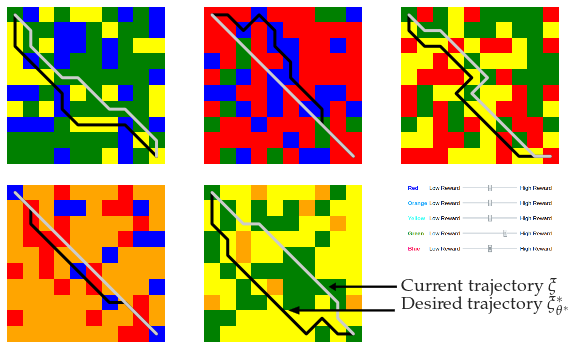

In [26]:
import cv2
img = cv2.imread('interactive_reward_design_hri/colorworld_sliders.png')

set_style()

fig = plt.gcf()

curr_weights = np.array([[0.0],
                         [0.5],
                         [0.5],
                         [0.5],
                         [0.2],
                         [0.5]])

for i, world in enumerate(mainstudy_colorworlds):
    data = np.array(world.cell_colors)
    data.shape = (world.rows, world.cols)
        
    ax = plt.subplot2grid((2, 3), (i / 3, i % 3))

    cmap = mpl.colors.ListedColormap(world.index_to_color.values())
    bounds = np.arange(len(world.index_to_color) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ax.imshow(data, interpolation='nearest',cmap=cmap, norm=norm, origin='upper')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    curr_traj = world.plan(curr_weights)
    curr_traj_i = []
    curr_traj_j = []
    for index in curr_traj:
        ii, jj = world.index_to_ij(index)
        curr_traj_i.append(ii)
        curr_traj_j.append(jj)
    
    traj = world.plan(true_weights)
    traj_i = []
    traj_j = []
    for index in traj:
        ii, jj = world.index_to_ij(index)
        traj_i.append(ii)
        traj_j.append(jj)
        
    ax.plot(traj_j, traj_i, color='black', linewidth=3)
    ax.plot(curr_traj_j, curr_traj_i, color='#cccccc', linewidth=3)
    
    if i == 4:
#         ax.annotate('Desired trajectory', xy=(0.4, 4.0), xytext=(11, 0.2),
#             arrowprops=dict(facecolor='black', 
#                             shrink=0.05,
#                             width=2,
#                             headwidth=8),
#             fontsize=12)
#         ax.annotate('Current trajectory', xy=(5.0, 4.5), xytext=(12, 1.4),
#             arrowprops=dict(facecolor='black', 
#                             shrink=0.05,
#                             width=2,
#                             headwidth=8),
#             fontsize=12)
        ax.annotate('Desired trajectory $\\xi^*_{\\theta^*}$', xy=(4.5, 7.5), xytext=(12, 7.5),
            arrowprops=dict(facecolor='black', 
                            shrink=0.05,
                            width=2,
                            headwidth=8),
            verticalalignment='center',
            fontsize=18)
        ax.annotate('Current trajectory $\\xi$', xy=(7.2, 6.0), xytext=(12, 6.0),
            arrowprops=dict(facecolor='black', 
                            shrink=0.05,
                            width=2,
                            headwidth=8),
            verticalalignment='center',
            fontsize=18)

ax = plt.subplot2grid((2, 3), (1, 2))
ax.imshow(img)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([500, 0])

# ax.annotate('Current trajectory', xy=(0.0, 400.0), xytext=(1000.0, 400.0),
#     arrowprops=dict(facecolor='black', 
#                     shrink=0.05,
#                     width=2,
#                     headwidth=8),
#     fontsize=12)


plt.subplots_adjust(hspace=0.13)

sns.despine(fig)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.savefig('interactive_reward_design_hri/MainStudyEnvs.pdf', bbox_inches='tight')

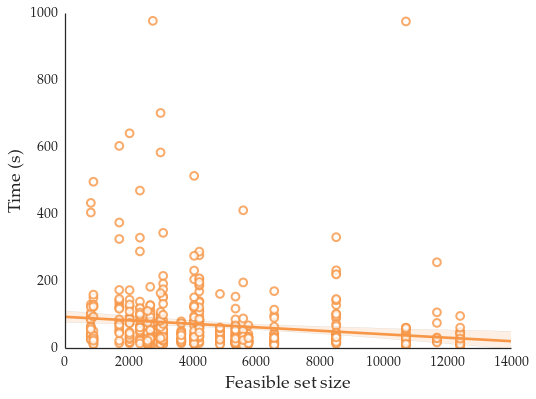

In [27]:
fig, ax = plt.subplots()

indep_df = pd.read_csv('interactive_reward_design_hri/factorial_study/table2_indep_10_4_2017.csv')
indep_df['time_taken'] = indep_df['time_taken'].apply(lambda x: x / 1000.0)

# plt.rcParams["lines.markeredgewidth"] = 1

set_style()
sns.set_context(rc={'lines.markeredgewidth': 2.0})

sns.regplot(x='feasible_set_size', 
            y='time_taken', 
            data=indep_df,
            ax=ax,
            marker='o',
            scatter_kws={'facecolors': 'white',
                         's': 60,
                         'edgecolors': indep_color},
            line_kws={'color': indep_color})
ax.set_ylim([0, 1000])
ax.set_xlabel("Feasible set size", fontsize=18)
ax.set_ylabel("Time (s)", fontsize=18)
sns.despine(fig)
fig.set_figwidth(8)
fig.set_figheight(6)
plt.savefig('interactive_reward_design_hri/TimeTaken_vs_FeasibleSetSize.pdf', bbox_inches='tight')

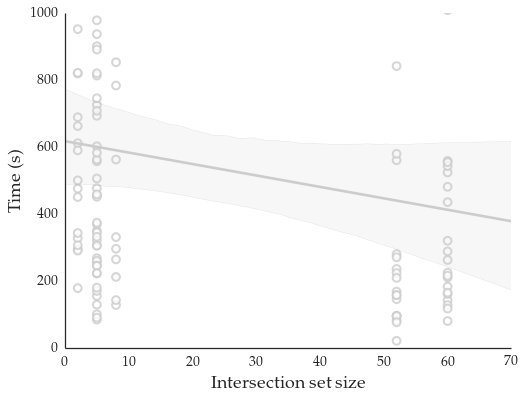

In [378]:
fig, ax = plt.subplots()

indep_df = pd.read_csv('interactive_reward_design_hri/factorial_study/table2_joint_10_4_2017.csv')
indep_df['time_taken'] = indep_df['time_taken'].apply(lambda x: x / 1000.0)

set_style()
sns.set_context(rc={'lines.markeredgewidth': 2.0})

sns.regplot(x='intersection_size', 
            y='time_taken', 
            data=indep_df,
            ax=ax,
            marker='o',
            scatter_kws={'facecolors': 'white',
                         's': 60,
                         'edgecolors': joint_color},
            line_kws={'color': joint_color})
ax.set_ylim([0, 1000])
ax.set_xlim([0, 70])
ax.set_xlabel("Intersection set size", fontsize=18)
ax.set_ylabel("Time (s)", fontsize=18)
sns.despine(fig)
fig.set_figwidth(8)
fig.set_figheight(6)
plt.savefig('interactive_reward_design_hri/TimeTaken_vs_IntersectionSetSize.pdf', bbox_inches='tight')

In [28]:
df_envs_study = pd.read_csv('interactive_reward_design_hri/env_set_size_study/num_envs_study.csv')

# Num envs
indep_numenvs = df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['num_envs']
joint_numenvs = df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['num_envs']

# Total time
indep_totaltime = df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['totaltime'] / 1000.0
joint_totaltime = df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['totaltime'] / 1000.0

# Regret
indep_regret =  df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['regret']
joint_regret =  df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['regret']

# Regret IRD
indep_regretIRD = df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['regretIRD']
joint_regretIRD = df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['regretIRD']

# Regret IRD risk averse
indep_regretIRD_riskaverse = df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['regretIRD_riskaverse']
joint_regretIRD_riskaverse = df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['regretIRD_riskaverse']

indep_likert_1 = df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['likert 1 (easy)']
indep_likert_2 = 8 - df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['likert 2 (harder)']
indep_likert_3 = df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['likert 3 (fast)']
indep_likert_4 = df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['likert 4 (less-runs)']             
indep_likert_5 = 8 - df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['likert 5 (frustrating)']
indep_likert_6 = 8 - df_envs_study[df_envs_study['joint_or_indep'] == 'indep']['likert 6 (back-forth)']

indep_likert = (indep_likert_1 + indep_likert_2 + indep_likert_3 + indep_likert_4 + indep_likert_5 + indep_likert_6) / 6.0

joint_likert_1 = df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['likert 1 (easy)']
joint_likert_2 = 8 - df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['likert 2 (harder)']
joint_likert_3 = df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['likert 3 (fast)']
joint_likert_4 = df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['likert 4 (less-runs)']             
joint_likert_5 = 8 - df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['likert 5 (frustrating)']
joint_likert_6 = 8 - df_envs_study[df_envs_study['joint_or_indep'] == 'joint']['likert 6 (back-forth)']

joint_likert = (joint_likert_1 + joint_likert_2 + joint_likert_3 + joint_likert_4 + joint_likert_5 + joint_likert_6) / 6.0

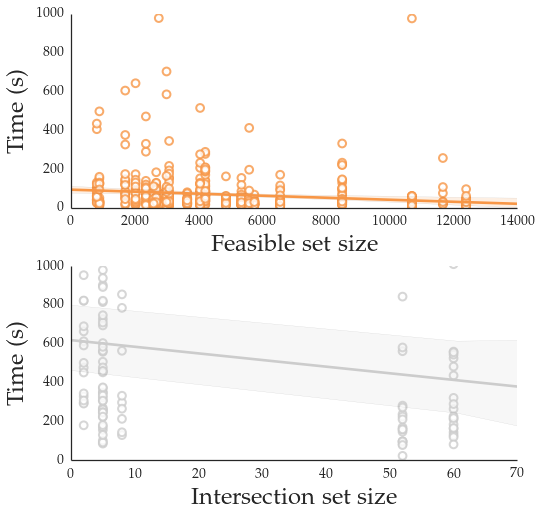

In [29]:
joint_df = pd.read_csv('interactive_reward_design_hri/factorial_study/table2_joint_10_4_2017.csv')
joint_df['time_taken'] = joint_df['time_taken'].apply(lambda x: x / 1000.0)

indep_df = pd.read_csv('interactive_reward_design_hri/factorial_study/table2_indep_10_4_2017.csv')
indep_df['time_taken'] = indep_df['time_taken'].apply(lambda x: x / 1000.0)

# fig, (ax1, ax2) = plt.subplots(1, 2)
fig, (ax1, ax2) = plt.subplots(2, 1)

set_style()
sns.set_context(rc={'lines.markeredgewidth': 2.0})

sns.regplot(x='feasible_set_size', 
            y='time_taken', 
            data=indep_df,
            ax=ax1,
            marker='o',
            scatter_kws={'facecolors': 'white',
                         's': 60,
                         'edgecolors': indep_color},
            line_kws={'color': indep_color})
ax1.set_ylim([0, 1000])
ax1.set_xlabel("Feasible set size", fontsize=24)
ax1.set_ylabel("Time (s)", fontsize=24)

sns.regplot(x='intersection_size', 
            y='time_taken', 
            data=joint_df,
            ax=ax2,
            marker='o',
            scatter_kws={'facecolors': 'white',
                         's': 60,
                         'edgecolors': joint_color},
            line_kws={'color': joint_color})
ax2.set_ylim([0, 1000])
ax2.set_xlim([0, 70])
ax2.set_xlabel("Intersection set size", fontsize=24)
ax2.set_ylabel("Time (s)", fontsize=24)

plt.subplots_adjust(hspace=0.3)

sns.despine(fig)
fig.set_figwidth(8)
fig.set_figheight(8)
plt.savefig('interactive_reward_design_hri/FeasibleIntersectionSetSizeStudy.pdf', bbox_inches='tight')

In [30]:
numenvs = [3, 5, 7, 9]

indep_totaltime_means = []
indep_totaltime_sems = []
for n in numenvs:
    mean = (df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                          (df_envs_study['num_envs'] == n)]['totaltime'] / 1000.0).mean()
    sem = (df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                          (df_envs_study['num_envs'] == n)]['totaltime'] / 1000.0).sem()
    
    indep_totaltime_means.append(mean)
    indep_totaltime_sems.append(sem)
    
joint_totaltime_means = []
joint_totaltime_sems = []
for n in numenvs:
    mean = (df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                          (df_envs_study['num_envs'] == n)]['totaltime'] / 1000.0).mean()
    sem = (df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                          (df_envs_study['num_envs'] == n)]['totaltime'] / 1000.0).sem()
    
    joint_totaltime_means.append(mean)
    joint_totaltime_sems.append(sem)
    
indep_totalruns_means = []
indep_totalruns_sems = []
for n in numenvs:
    mean = (df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                          (df_envs_study['num_envs'] == n)]['totalruns']).mean()
    sem = (df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                          (df_envs_study['num_envs'] == n)]['totalruns']).sem()
    
    indep_totalruns_means.append(mean)
    indep_totalruns_sems.append(sem)
    
joint_totalruns_means = []
joint_totalruns_sems = []
for n in numenvs:
    mean = (df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                          (df_envs_study['num_envs'] == n)]['totalruns']).mean()
    sem = (df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                          (df_envs_study['num_envs'] == n)]['totalruns']).sem()
    
    joint_totalruns_means.append(mean)
    joint_totalruns_sems.append(sem)
    
indep_regret_means = []
indep_regret_sems = []
for n in numenvs:
    mean = df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                         (df_envs_study['num_envs'] == n)]['regret'].mean()
    sem = df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                        (df_envs_study['num_envs'] == n)]['regret'].sem()
    
    indep_regret_means.append(mean)
    indep_regret_sems.append(sem)   
    
joint_regret_means = []
joint_regret_sems = []
for n in numenvs:
    mean = df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                         (df_envs_study['num_envs'] == n)]['regret'].mean()
    sem = df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                        (df_envs_study['num_envs'] == n)]['regret'].sem()
    
    joint_regret_means.append(mean)
    joint_regret_sems.append(sem)
    
    
indep_likert_means = []
indep_likert_sems = []
for n in numenvs:
    indep_likert_1 = df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                                   (df_envs_study['num_envs'] == n)]['likert 1 (easy)']
    indep_likert_2 = 8 - df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                                       (df_envs_study['num_envs'] == n)]['likert 2 (harder)']
    indep_likert_3 = df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                                   (df_envs_study['num_envs'] == n)]['likert 3 (fast)']
    indep_likert_4 = df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                                   (df_envs_study['num_envs'] == n)]['likert 4 (less-runs)']             
    indep_likert_5 = 8 - df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                                       (df_envs_study['num_envs'] == n)]['likert 5 (frustrating)']
    indep_likert_6 = 8 - df_envs_study[(df_envs_study['joint_or_indep'] == 'indep') &
                                       (df_envs_study['num_envs'] == n)]['likert 6 (back-forth)']

    indep_likert = (indep_likert_1 + indep_likert_2 + indep_likert_3 + indep_likert_4 + indep_likert_5 + indep_likert_6) / 6.0

    indep_likert_means.append(indep_likert.mean())
    indep_likert_sems.append(indep_likert.sem())
    
joint_likert_means = []
joint_likert_sems = []
for n in numenvs:
    joint_likert_1 = df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                                   (df_envs_study['num_envs'] == n)]['likert 1 (easy)']
    joint_likert_2 = 8 - df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                                       (df_envs_study['num_envs'] == n)]['likert 2 (harder)']
    joint_likert_3 = df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                                   (df_envs_study['num_envs'] == n)]['likert 3 (fast)']
    joint_likert_4 = df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                                   (df_envs_study['num_envs'] == n)]['likert 4 (less-runs)']             
    joint_likert_5 = 8 - df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                                       (df_envs_study['num_envs'] == n)]['likert 5 (frustrating)']
    joint_likert_6 = 8 - df_envs_study[(df_envs_study['joint_or_indep'] == 'joint') &
                                       (df_envs_study['num_envs'] == n)]['likert 6 (back-forth)']

    joint_likert = (joint_likert_1 + joint_likert_2 + joint_likert_3 + joint_likert_4 + joint_likert_5 + joint_likert_6) / 6.0

    joint_likert_means.append(joint_likert.mean())
    joint_likert_sems.append(joint_likert.sem())

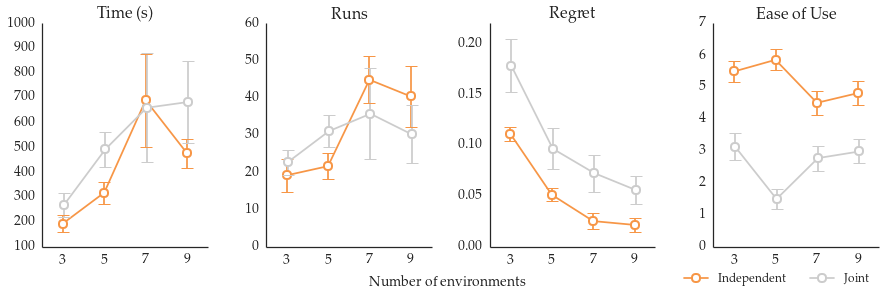

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

set_style()
sns.set_context(rc={'lines.markeredgewidth': 2.0})

capsize = 6
markersize = 8

ax1.set_title('Time (s)', fontsize=16, fontweight='normal')
ax1.errorbar(numenvs, indep_totaltime_means, yerr=indep_totaltime_sems, color=indep_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=indep_color,
             markersize=markersize)
ax1.errorbar(np.array(numenvs) + 0.05, joint_totaltime_means, yerr=joint_totaltime_sems, color=joint_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=joint_color,
             markersize=markersize)
ax1.set_ylim([100, 1000])
ax1.set_xlim([2, 10])
ax1.set_xticks([3, 5, 7, 9])
plt.sca(ax1)

ax2.set_title('Runs', fontsize=16, fontweight='normal')
ax2.errorbar(numenvs, indep_totalruns_means, yerr=indep_totalruns_sems, color=indep_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=indep_color,
             markersize=markersize)
ax2.errorbar(np.array(numenvs) + 0.05, joint_totalruns_means, yerr=joint_totalruns_sems, color=joint_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=joint_color,
             markersize=markersize)
ax2.set_ylim([0, 60])
ax2.set_xlim([2, 10])
ax2.set_xticks([3, 5, 7, 9])
plt.sca(ax2)

ax3.set_title('Regret', fontsize=16, fontweight='normal')
ax3.errorbar(numenvs, indep_regret_means, yerr=indep_regret_sems, color=indep_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=indep_color,
             markersize=markersize)
ax3.errorbar(np.array(numenvs) + 0.05, joint_regret_means, yerr=joint_regret_sems, color=joint_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=joint_color,
             markersize=markersize)
ax3.set_ylim([0, 0.22])
ax3.set_xlim([2, 10])
ax3.set_xticks([3, 5, 7, 9])
plt.sca(ax3)

ax4.set_title('Ease of Use', fontsize=16, fontweight='normal')
r1 = ax4.errorbar(numenvs, indep_likert_means, yerr=indep_likert_sems, color=indep_color, 
                  capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=indep_color,
                  markersize=markersize)
r2 = ax4.errorbar(np.array(numenvs) + 0.05, joint_likert_means, yerr=joint_likert_sems, color=joint_color, 
                  capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=joint_color,
                  markersize=markersize)
ax4.set_ylim([0, 7])
ax4.set_xlim([2, 10])
ax4.set_xticks([3, 5, 7, 9])
plt.sca(ax4)

plt.suptitle("Number of environments", y=0.02, fontsize=14)

# leg = plt.legend((r1[0], r2[0]), 
#                 ('Independent', 'Joint'), 
#                 loc='lower right',
#                 ncol=1, 
#                 fontsize=11,
#                 bbox_to_anchor=(1.7, 1.0))
leg = plt.legend((r1[0], r2[0]), 
                ('Independent', 'Joint'), 
                loc='lower right',
                ncol=2, 
                fontsize=12,
                bbox_to_anchor=(1.0, -0.225))

plt.subplots_adjust(wspace=0.35)

sns.despine(fig)
fig.set_figwidth(15)
fig.set_figheight(4)
plt.savefig('interactive_reward_design_hri/NumEnvsStudy.pdf', bbox_inches='tight')

In [37]:
df_feats_study = pd.read_csv('interactive_reward_design_hri/num_features_study/num_features_study.csv')

numfeats = [2, 3, 4, 5]

indep_totaltime_means = []
indep_totaltime_sems = []
for n in numfeats:
    mean = (df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                          (df_feats_study['num_features'] == n)]['totaltime'] / 1000.0).mean()
    sem = (df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                          (df_feats_study['num_features'] == n)]['totaltime'] / 1000.0).sem()
    
    indep_totaltime_means.append(mean)
    indep_totaltime_sems.append(sem)
    
joint_totaltime_means = []
joint_totaltime_sems = []
for n in numfeats:
    mean = (df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                          (df_feats_study['num_features'] == n)]['totaltime'] / 1000.0).mean()
    sem = (df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                          (df_feats_study['num_features'] == n)]['totaltime'] / 1000.0).sem()
    
    joint_totaltime_means.append(mean)
    joint_totaltime_sems.append(sem)
    
indep_totalruns_means = []
indep_totalruns_sems = []
for n in numfeats:
    mean = (df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                          (df_feats_study['num_features'] == n)]['totalruns']).mean()
    sem = (df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                          (df_feats_study['num_features'] == n)]['totalruns']).sem()
    
    indep_totalruns_means.append(mean)
    indep_totalruns_sems.append(sem)
    
joint_totalruns_means = []
joint_totalruns_sems = []
for n in numfeats:
    mean = (df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                          (df_feats_study['num_features'] == n)]['totalruns']).mean()
    sem = (df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                          (df_feats_study['num_features'] == n)]['totalruns']).sem()
    
    joint_totalruns_means.append(mean)
    joint_totalruns_sems.append(sem)
    
indep_regret_means = []
indep_regret_sems = []
for n in numfeats:
    mean = df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                         (df_feats_study['num_features'] == n)]['regret'].mean()
    sem = df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                        (df_feats_study['num_features'] == n)]['regret'].sem()
    
    indep_regret_means.append(mean)
    indep_regret_sems.append(sem)
    
indep_regretIRD_riskaverse_means = []
indep_regretIRD_riskaverse_sems = []
for n in numfeats:
    mean = df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                         (df_feats_study['num_features'] == n)]['regretIRD_riskaverse'].mean()
    sem = df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                        (df_feats_study['num_features'] == n)]['regretIRD_riskaverse'].sem()
    
    indep_regretIRD_riskaverse_means.append(mean)
    indep_regretIRD_riskaverse_sems.append(sem)
    
joint_regret_means = []
joint_regret_sems = []
for n in numfeats:
    mean = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                         (df_feats_study['num_features'] == n)]['regret'].mean()
    sem = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                        (df_feats_study['num_features'] == n)]['regret'].sem()
    
    joint_regret_means.append(mean)
    joint_regret_sems.append(sem)
    
joint_regretIRD_means = []
joint_regretIRD_sems = []
for n in numfeats:
    mean = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                         (df_feats_study['num_features'] == n)]['regretIRD'].mean()
    sem = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                        (df_feats_study['num_features'] == n)]['regretIRD'].sem()
    
    joint_regretIRD_means.append(mean)
    joint_regretIRD_sems.append(sem)

joint_regretIRD_riskaverse_means = []
joint_regretIRD_riskaverse_sems = []
for n in numfeats:
    mean = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                         (df_feats_study['num_features'] == n)]['regretIRD_riskaverse'].mean()
    sem = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                        (df_feats_study['num_features'] == n)]['regretIRD_riskaverse'].sem()
    
    joint_regretIRD_riskaverse_means.append(mean)
    joint_regretIRD_riskaverse_sems.append(sem)
    
indep_likert_means = []
indep_likert_sems = []
for n in numfeats:
    indep_likert_1 = df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                                   (df_feats_study['num_features'] == n)]['likert 1 (easy)']
    indep_likert_2 = 8 - df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                                       (df_feats_study['num_features'] == n)]['likert 2 (harder)']
    indep_likert_3 = df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                                   (df_feats_study['num_features'] == n)]['likert 3 (fast)']
    indep_likert_4 = df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                                   (df_feats_study['num_features'] == n)]['likert 4 (less-runs)']             
    indep_likert_5 = 8 - df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                                       (df_feats_study['num_features'] == n)]['likert 5 (frustrating)']
    indep_likert_6 = 8 - df_feats_study[(df_feats_study['joint_or_indep'] == 'indep') &
                                       (df_feats_study['num_features'] == n)]['likert 6 (back-forth)']

    indep_likert = (indep_likert_1 + indep_likert_2 + indep_likert_3 + indep_likert_4 + indep_likert_5 + indep_likert_6) / 6.0

    indep_likert_means.append(indep_likert.mean())
    indep_likert_sems.append(indep_likert.sem())
    
joint_likert_means = []
joint_likert_sems = []
for n in numfeats:
    joint_likert_1 = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                                   (df_feats_study['num_features'] == n)]['likert 1 (easy)']
    joint_likert_2 = 8 - df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                                       (df_feats_study['num_features'] == n)]['likert 2 (harder)']
    joint_likert_3 = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                                   (df_feats_study['num_features'] == n)]['likert 3 (fast)']
    joint_likert_4 = df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                                   (df_feats_study['num_features'] == n)]['likert 4 (less-runs)']             
    joint_likert_5 = 8 - df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                                       (df_feats_study['num_features'] == n)]['likert 5 (frustrating)']
    joint_likert_6 = 8 - df_feats_study[(df_feats_study['joint_or_indep'] == 'joint') &
                                       (df_feats_study['num_features'] == n)]['likert 6 (back-forth)']

    joint_likert = (joint_likert_1 + joint_likert_2 + joint_likert_3 + joint_likert_4 + joint_likert_5 + joint_likert_6) / 6.0

    joint_likert_means.append(joint_likert.mean())
    joint_likert_sems.append(joint_likert.sem())

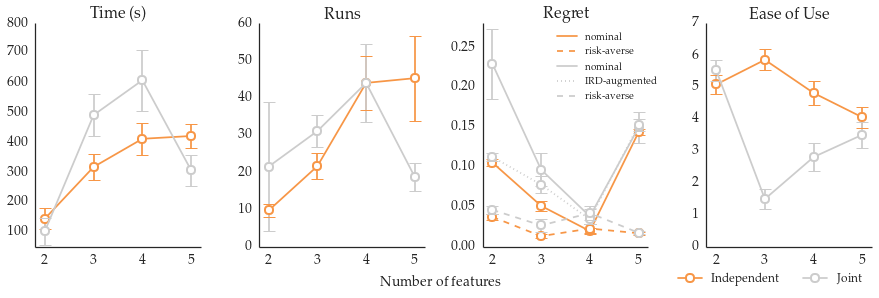

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

set_style()
sns.set_context(rc={'lines.markeredgewidth': 2.0})

capsize = 6
spacing = 0.0

ax1.set_title('Time (s)', fontsize=16, fontweight='normal')
ax1.errorbar(numfeats, indep_totaltime_means, yerr=indep_totaltime_sems, color=indep_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=indep_color,
             markersize=markersize)
ax1.errorbar(np.array(numfeats) + spacing, joint_totaltime_means, yerr=joint_totaltime_sems, color=joint_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=joint_color,
             markersize=markersize)
ax1.set_ylim([50, 800])
ax1.set_xlim([1.8, 5.2])
ax1.set_xticks([2, 3, 4, 5])
plt.sca(ax1)

ax2.set_title('Runs', fontsize=16, fontweight='normal')
ax2.errorbar(numfeats, indep_totalruns_means, yerr=indep_totalruns_sems, color=indep_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=indep_color,
             markersize=markersize)
ax2.errorbar(np.array(numfeats) + spacing, joint_totalruns_means, yerr=joint_totalruns_sems, color=joint_color, 
             capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=joint_color,
             markersize=markersize)
ax2.set_ylim([0, 60])
ax2.set_xlim([1.8, 5.2])
ax2.set_xticks([2, 3, 4, 5])
plt.sca(ax2)

ax3.set_title('Regret', fontsize=16, fontweight='normal')
r1 = ax3.errorbar(numfeats, indep_regret_means, yerr=indep_regret_sems, color=indep_color, 
                  capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=indep_color,
                  markersize=markersize)
r2 = ax3.errorbar(numfeats, 
                  indep_regretIRD_riskaverse_means, 
                  yerr=indep_regretIRD_riskaverse_sems,
                  color=indep_color,
                  capsize=capsize, 
                  capthick=1,
                  linestyle='dashed',
                  marker='o', 
                  markerfacecolor='white', 
                  markeredgecolor=indep_color,
                  markersize=markersize)
r3 = ax3.errorbar(np.array(numfeats) + spacing, joint_regret_means, yerr=joint_regret_sems, color=joint_color, 
                  capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=joint_color,
                  markersize=markersize)
r4 = ax3.errorbar(numfeats,
                  joint_regretIRD_means,
                  yerr=joint_regretIRD_sems,
                  color=joint_color,
                  capsize=capsize,
                  capthick=1,
                  linestyle='dotted',
                  marker='o',
                  markerfacecolor='white',
                  markeredgecolor=joint_color,
                  markersize=markersize)
r5 = ax3.errorbar(numfeats,
                  joint_regretIRD_riskaverse_means,
                  yerr=joint_regretIRD_riskaverse_sems,
                  color=joint_color,
                  capsize=capsize,
                  capthick=1,
                  linestyle='dashed',
                  marker='o', 
                  markerfacecolor='white',
                  markeredgecolor=joint_color,
                  markersize=markersize)
ax3.set_ylim([0, 0.28])
ax3.set_xlim([1.8, 5.2])
ax3.set_xticks([2, 3, 4, 5])
plt.sca(ax3)

def create_dummy_line(**kwds):
    return mpl.lines.Line2D([], [], **kwds)

lines = [
    ('nominal', {'color': '#f79646', 'linestyle': 'solid'}),
    ('risk-averse', {'color': '#f79646', 'linestyle': 'dashed'}),
    ('nominal', {'color': '#cccccc', 'linestyle': 'solid'}),
    ('IRD-augmented', {'color': '#cccccc', 'linestyle': 'dotted'}),
    ('risk-averse', {'color': '#cccccc', 'linestyle': 'dashed'})
]

leg = plt.legend([create_dummy_line(**l[1]) for l in lines], 
                [l[0] for l in lines], 
                loc='upper right',
                ncol=1, 
                fontsize=10,
                bbox_to_anchor=(1.1, 1.0))

ax4.set_title('Ease of Use', fontsize=16, fontweight='normal')
r1 = ax4.errorbar(numfeats, indep_likert_means, yerr=indep_likert_sems, color=indep_color, 
                  capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=indep_color,
                  markersize=markersize)
r2 = ax4.errorbar(np.array(numfeats) + spacing, joint_likert_means, yerr=joint_likert_sems, color=joint_color, 
                  capsize=capsize, capthick=1, marker='o', markerfacecolor='white', markeredgecolor=joint_color,
                  markersize=markersize)
ax4.set_ylim([0, 7])
ax4.set_xlim([1.8, 5.2])
ax4.set_xticks([2, 3, 4, 5])
plt.sca(ax4)

plt.suptitle("Number of features", y=0.02, fontsize=14)

# leg = plt.legend((r1[0], r2[0]), 
#                 ('Independent', 'Joint'), 
#                 loc='lower right',
#                 ncol=1, 
#                 fontsize=11,
#                 bbox_to_anchor=(1.7, 1.0))
leg = plt.legend((r1[0], r2[0]), 
                ('Independent', 'Joint'), 
                loc='lower right',
                ncol=2, 
                fontsize=12,
                bbox_to_anchor=(1.0, -0.225))

plt.subplots_adjust(wspace=0.35)

sns.despine(fig)
fig.set_figwidth(15)
fig.set_figheight(4)
plt.savefig('interactive_reward_design_hri/NumFeatsStudy.pdf', bbox_inches='tight')

In [58]:
factorial_study_df = pd.read_csv('interactive_reward_design_hri/factorial_study/factorial.csv') #time
feats_study_df = pd.read_csv('interactive_reward_design_hri/num_features_study/num_features_study.csv') #totaltime
envs_study_df = pd.read_csv('interactive_reward_design_hri/env_set_size_study/num_envs_study.csv') #totaltime

In [80]:
times_joint = []
times_joint += [t / 1000.0 for t in factorial_study_df[factorial_study_df['indep_or_joint'] == 'joint']['time']]
times_joint += [t / 1000.0 for t in feats_study_df[feats_study_df['joint_or_indep'] == 'joint']['totaltime']]
times_joint += [t / 1000.0 for t in envs_study_df[envs_study_df['joint_or_indep'] == 'joint']['totaltime']]
times_joint_mean = np.mean(times_joint)

times_indep = []
times_indep += [t / 1000.0 for t in factorial_study_df[factorial_study_df['indep_or_joint'] == 'indep']['time']]
times_indep += [t / 1000.0 for t in feats_study_df[feats_study_df['joint_or_indep'] == 'indep']['totaltime']]
times_indep += [t / 1000.0 for t in envs_study_df[envs_study_df['joint_or_indep'] == 'indep']['totaltime']]
times_indep_mean = np.mean(times_indep)

In [83]:
(times_joint_mean - times_indep_mean) / times_joint_mean

0.25735896097759786

In [90]:
runs_joint = []
runs_joint += [t for t in factorial_study_df[factorial_study_df['indep_or_joint'] == 'joint']['runs']]
runs_joint += [t for t in feats_study_df[feats_study_df['joint_or_indep'] == 'joint']['totalruns']]
runs_joint += [t for t in envs_study_df[envs_study_df['joint_or_indep'] == 'joint']['totalruns']]
runs_joint_mean = np.mean(runs_joint)

runs_indep = []
runs_indep += [t for t in factorial_study_df[factorial_study_df['indep_or_joint'] == 'indep']['runs']]
runs_indep += [t for t in feats_study_df[feats_study_df['joint_or_indep'] == 'indep']['totalruns']]
runs_indep += [t for t in envs_study_df[envs_study_df['joint_or_indep'] == 'indep']['totalruns']]
runs_indep_mean = np.mean(runs_indep)

In [91]:
(runs_joint_mean - runs_indep_mean) / runs_joint_mean

0.021577789994502546

In [92]:
regret_joint = []
regret_joint += [t for t in factorial_study_df[factorial_study_df['indep_or_joint'] == 'joint']['regret']]
regret_joint += [t for t in feats_study_df[feats_study_df['joint_or_indep'] == 'joint']['regret']]
regret_joint += [t for t in envs_study_df[envs_study_df['joint_or_indep'] == 'joint']['regret']]
regret_joint_mean = np.mean(regret_joint)

regret_indep = []
regret_indep += [t for t in factorial_study_df[factorial_study_df['indep_or_joint'] == 'indep']['regret']]
regret_indep += [t for t in feats_study_df[feats_study_df['joint_or_indep'] == 'indep']['regret']]
regret_indep += [t for t in envs_study_df[envs_study_df['joint_or_indep'] == 'indep']['regret']]
regret_indep_mean = np.mean(regret_indep)

In [95]:
(regret_joint_mean - regret_indep_mean) / regret_joint_mean

0.43645809895886628